In [3]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

print(cancer)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df=pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['class']=cancer.target
df.tail()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension  class  
564                0.2216          0.2060                  0.07115      0  
565                0.1628          0.2572                  0.06637      0  
566                0.1418          0.2218                  0.07820      0  
567                0.2650          0.4087                  0.12400      0  
568                0.0000          0.2871                  0.07039      1  

[5 rows x 31 columns]

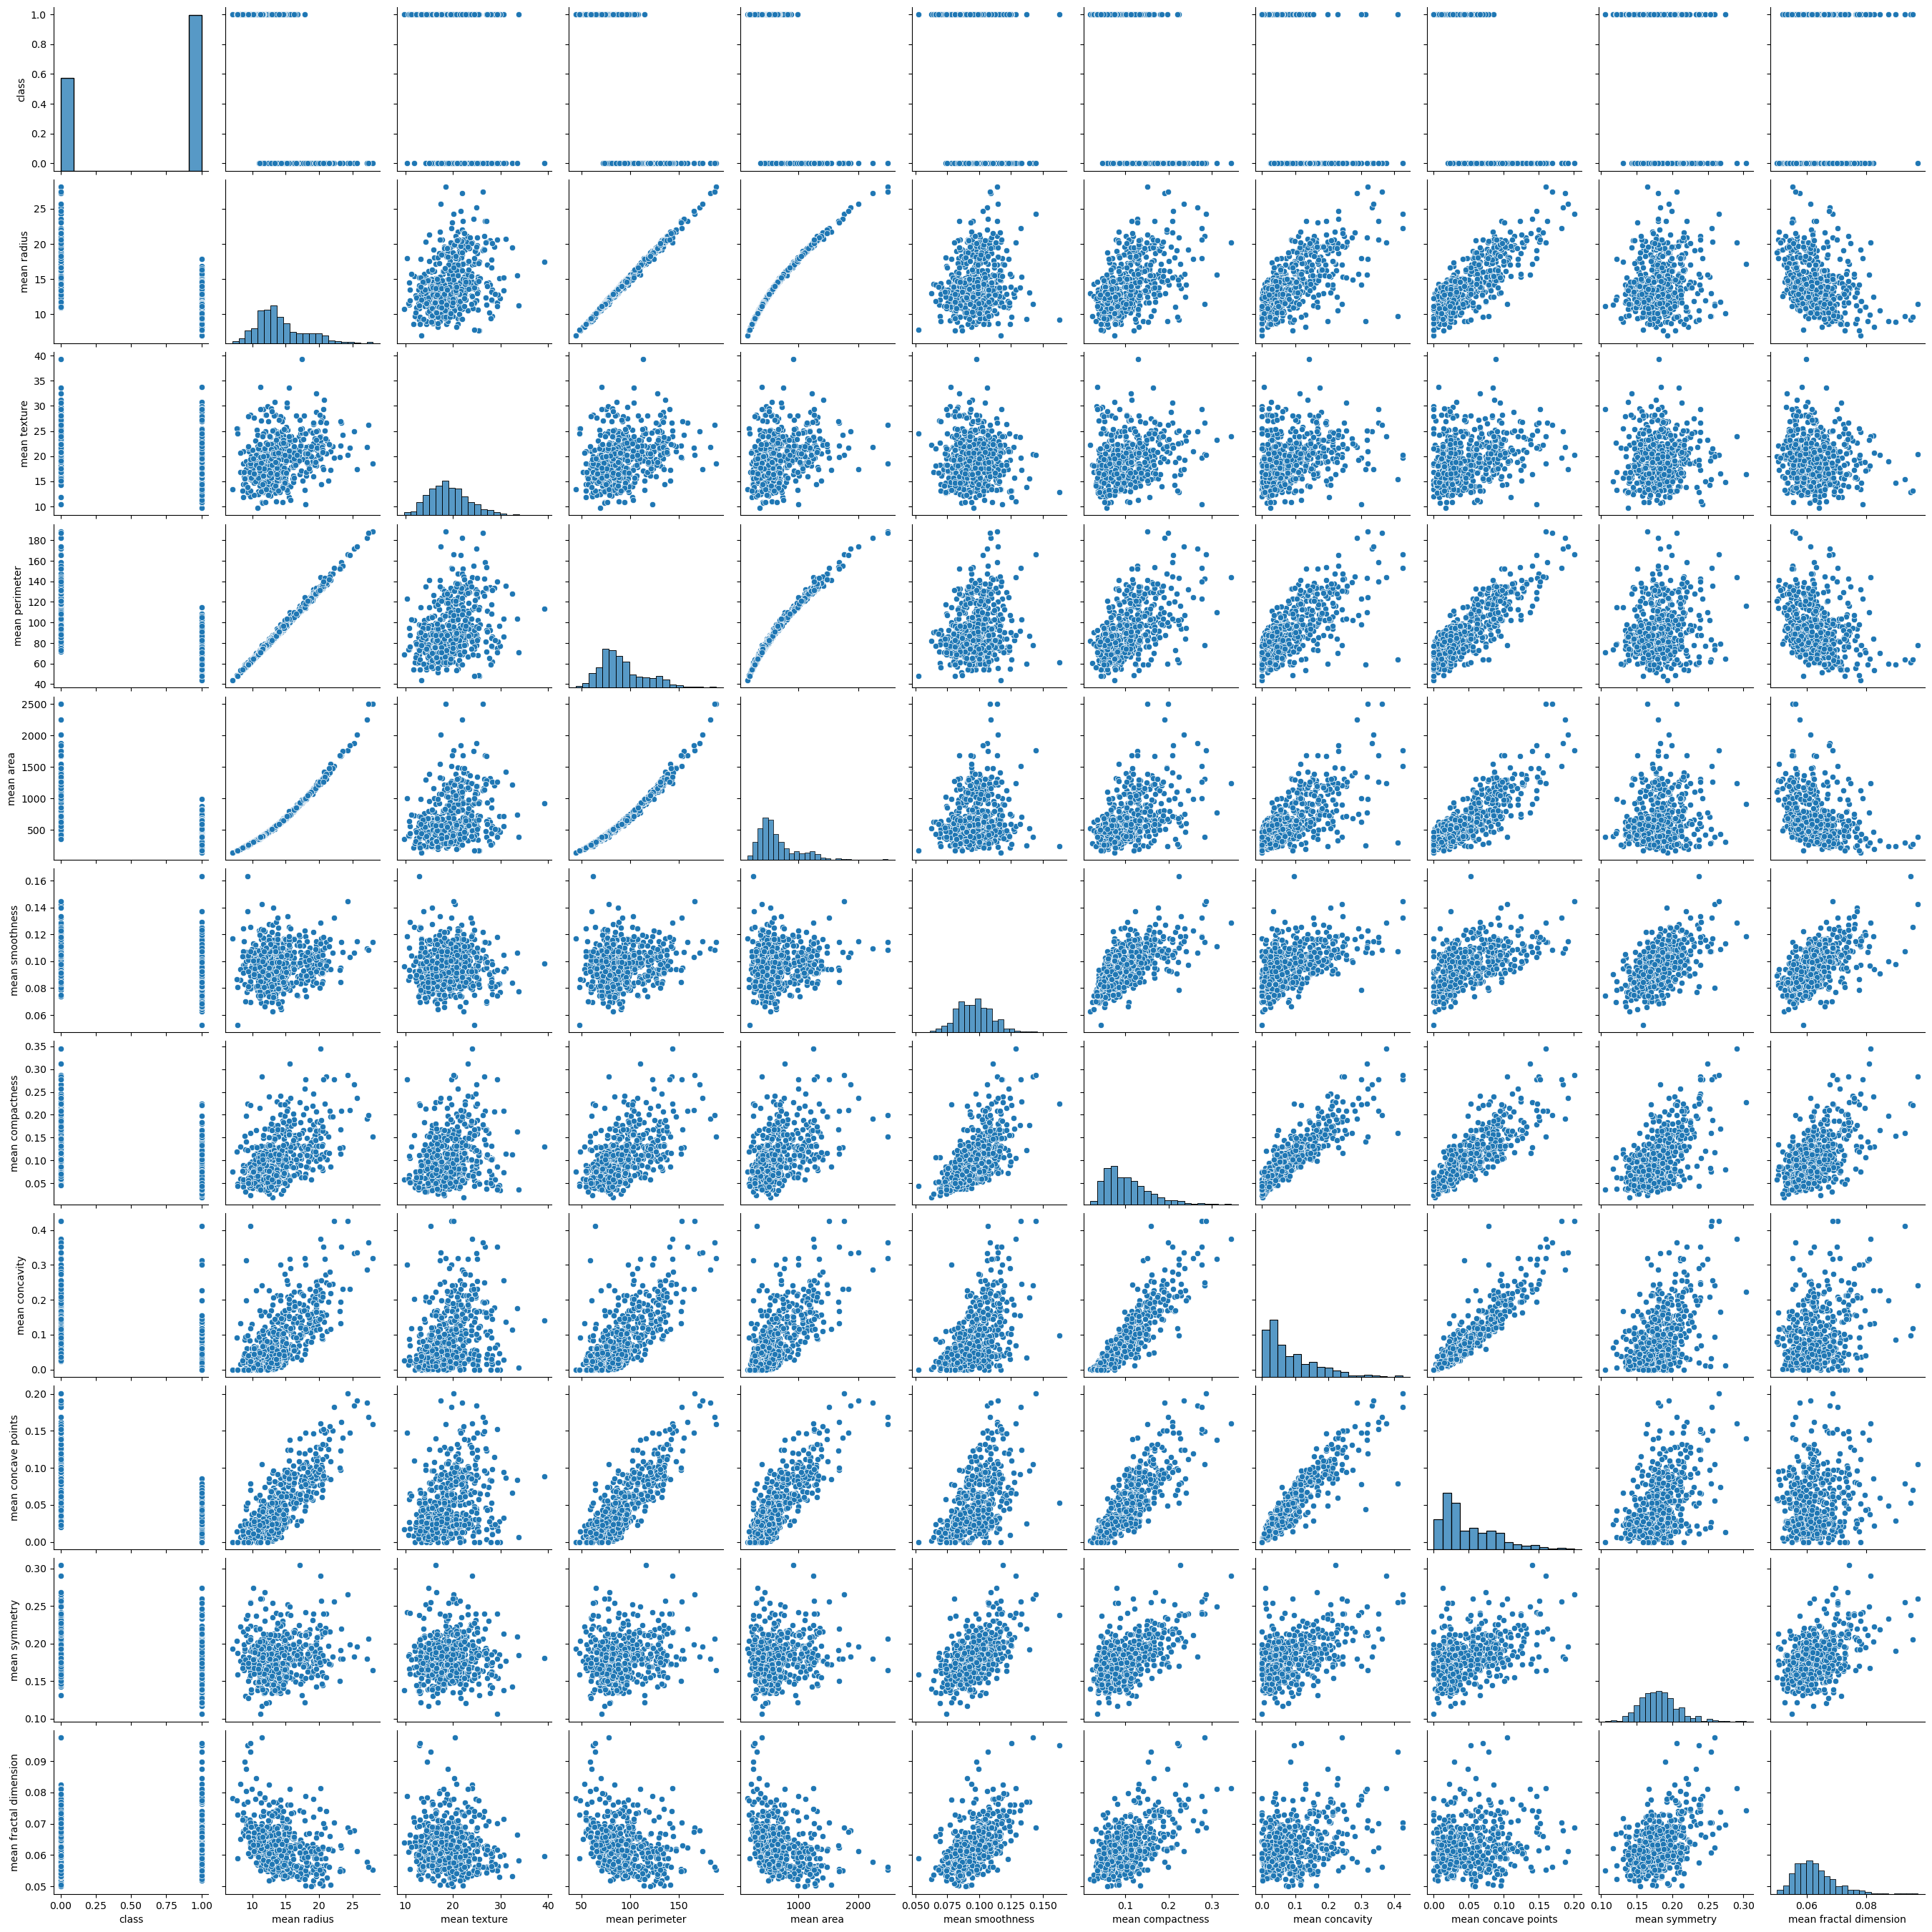

In [10]:
sns.pairplot(df[['class']+list(df.columns[:10])])

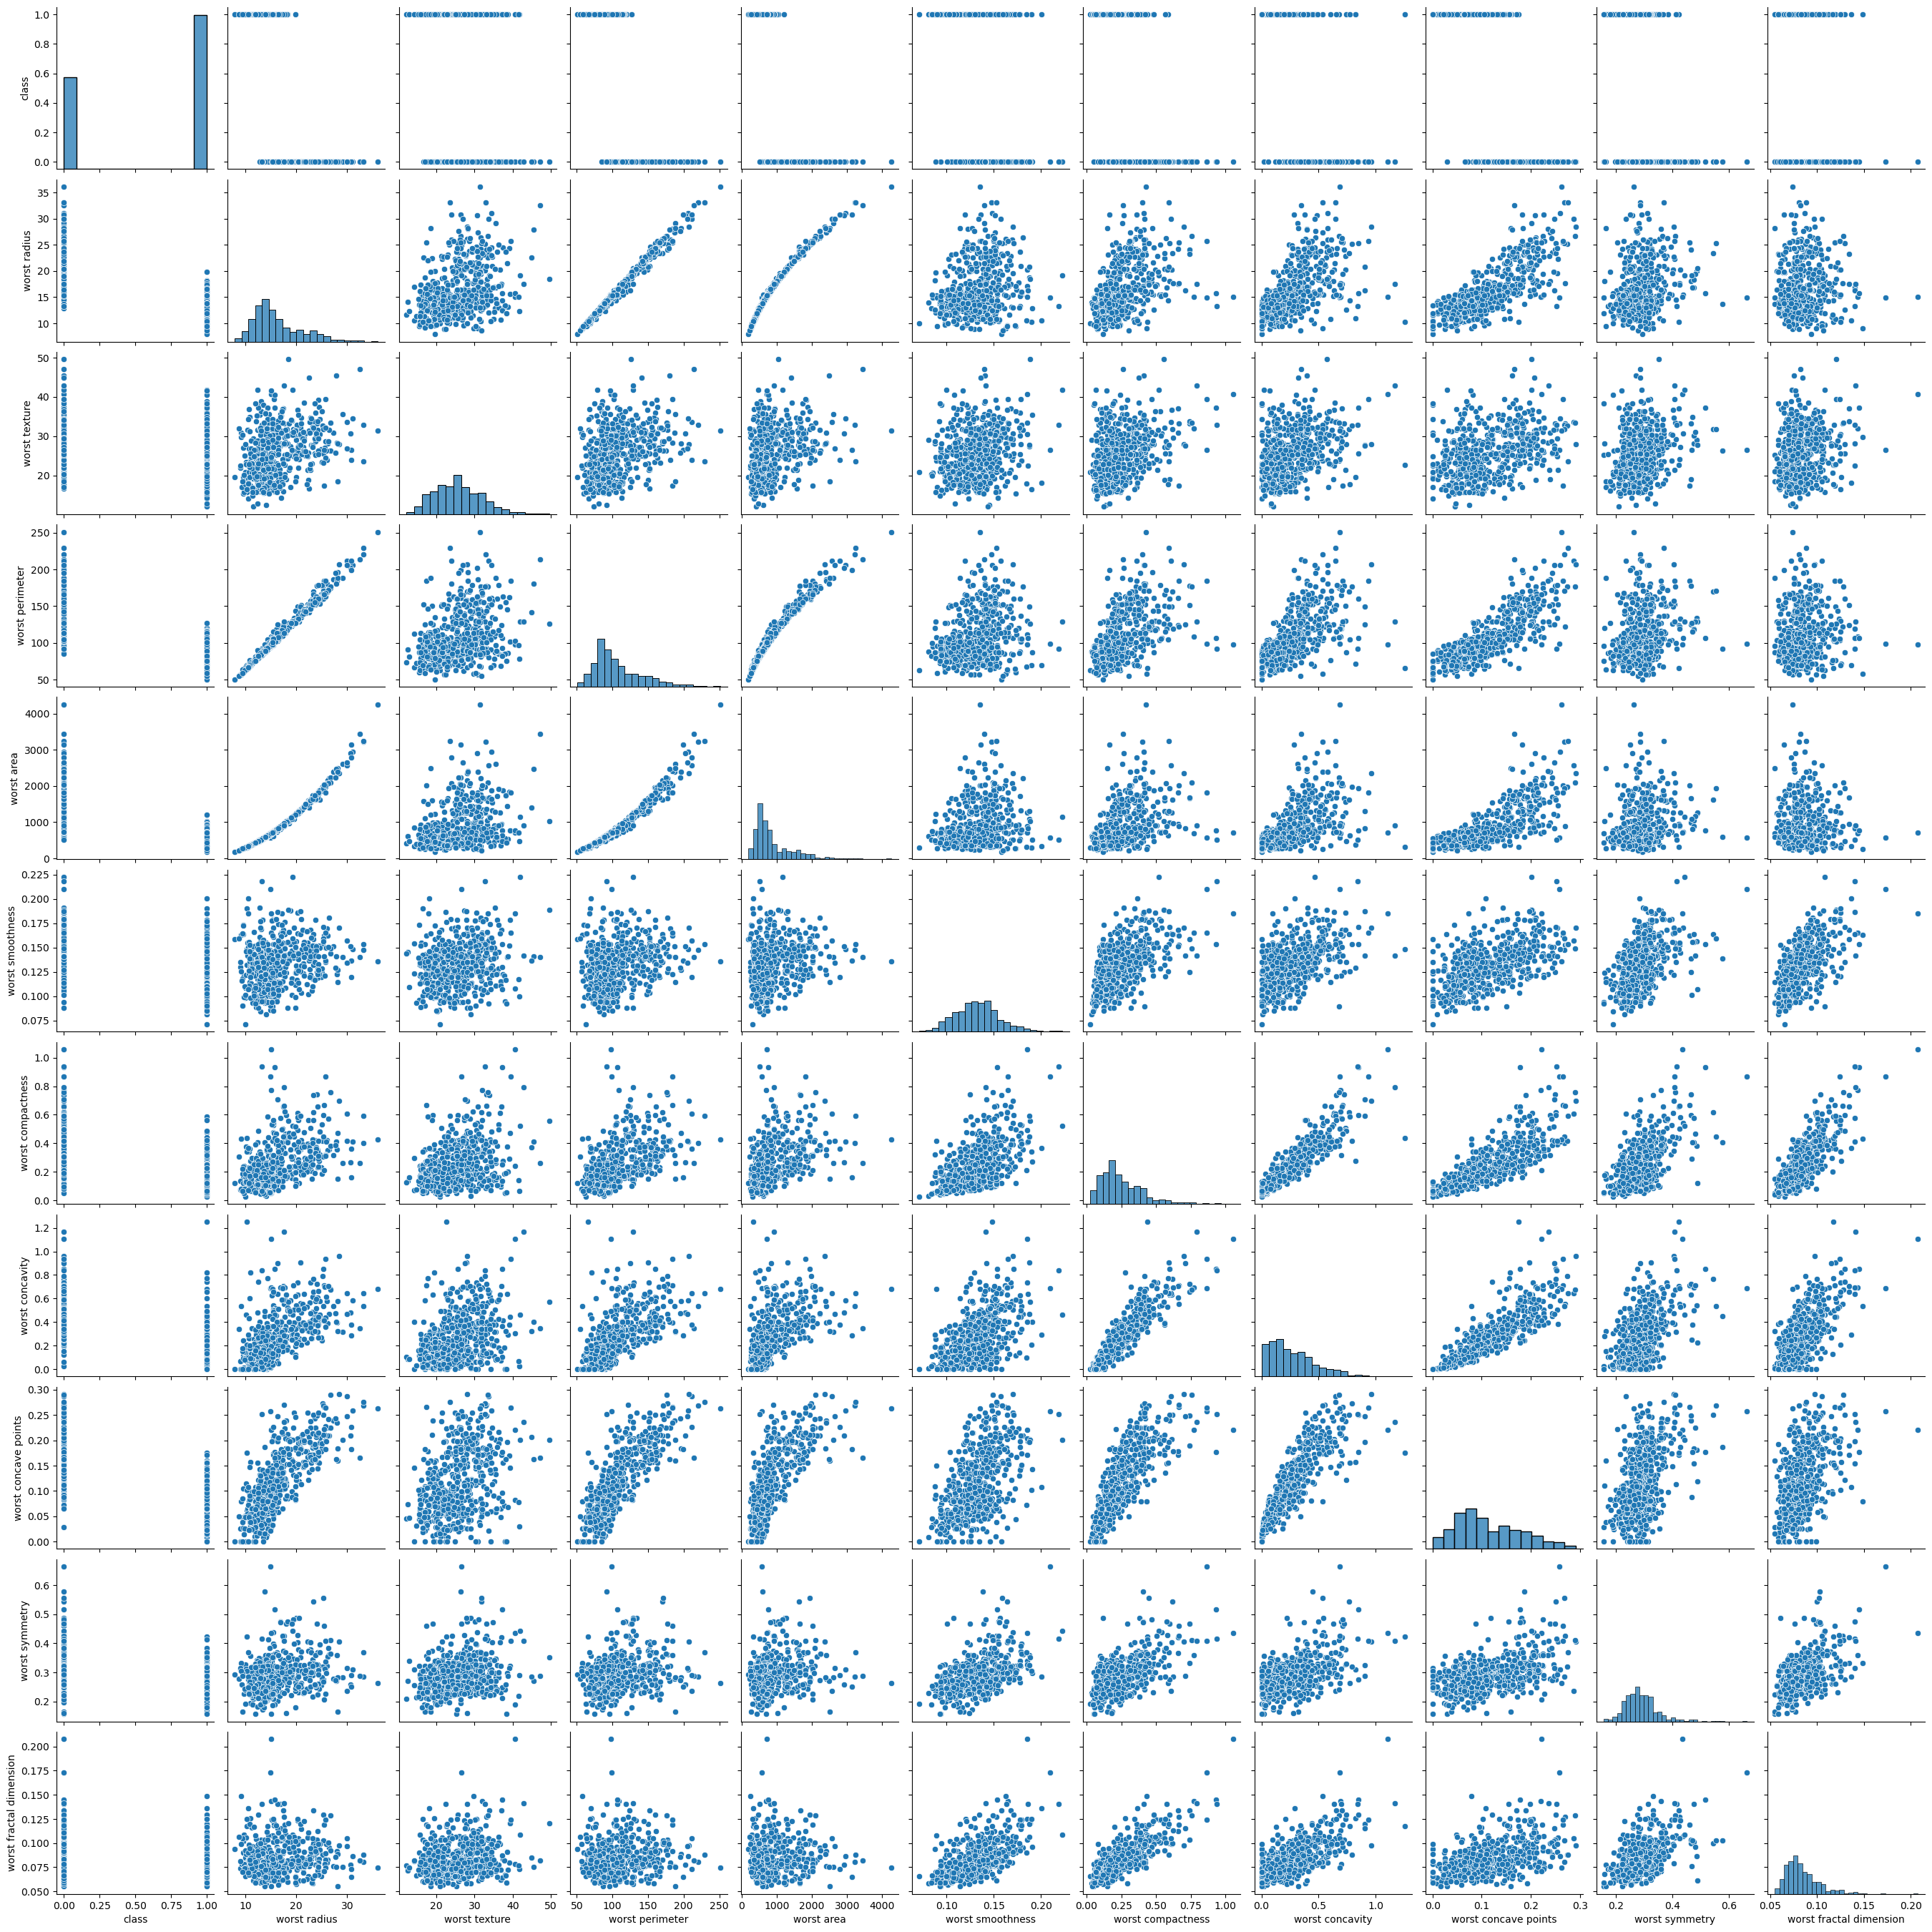

In [12]:
sns.pairplot(df[['class']+list(df.columns[20:30])])

In [13]:
cols = ["mean radius", "mean texture",
        "mean smoothness", "mean compactness", "mean concave points",
        "worst radius", "worst texture",
        "worst smoothness", "worst compactness", "worst concave points",
        "class"]

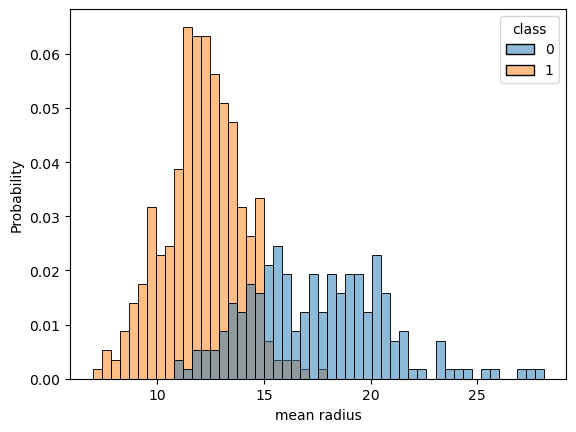

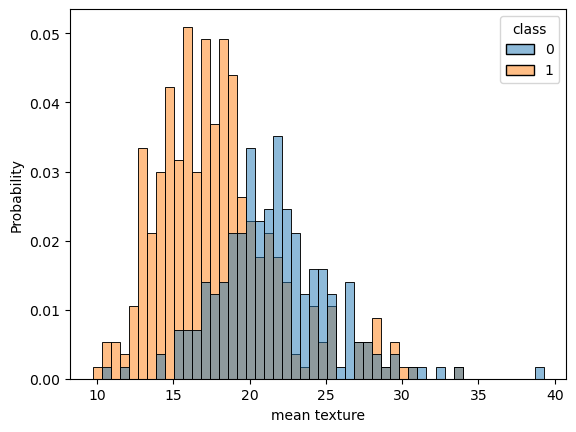

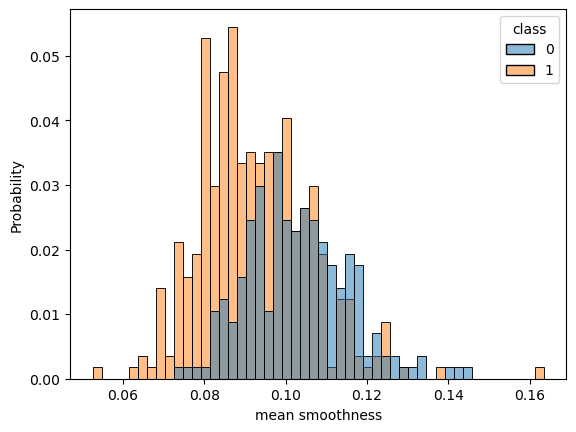

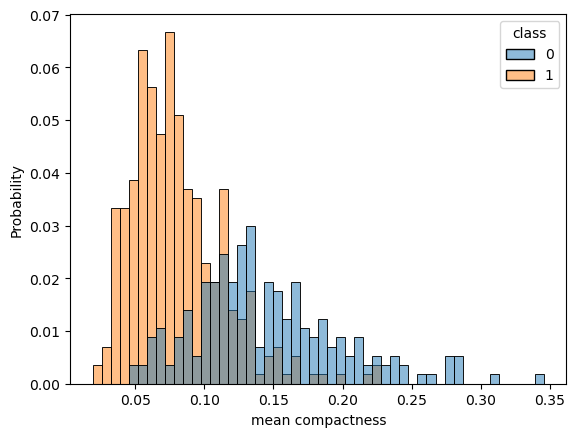

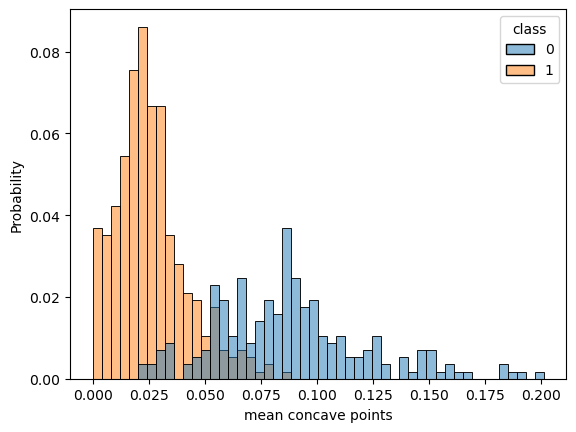

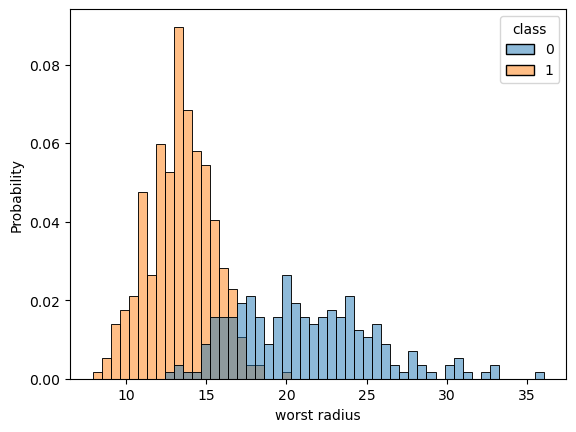

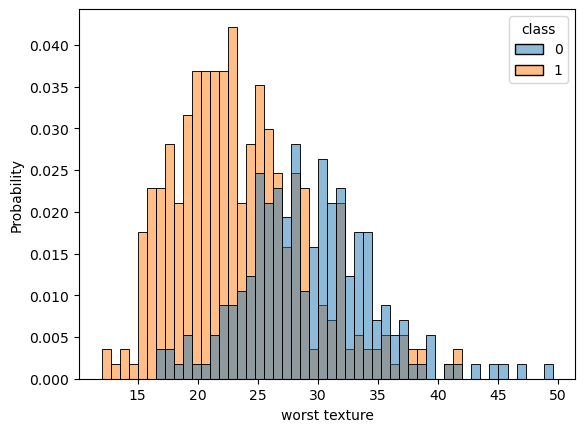

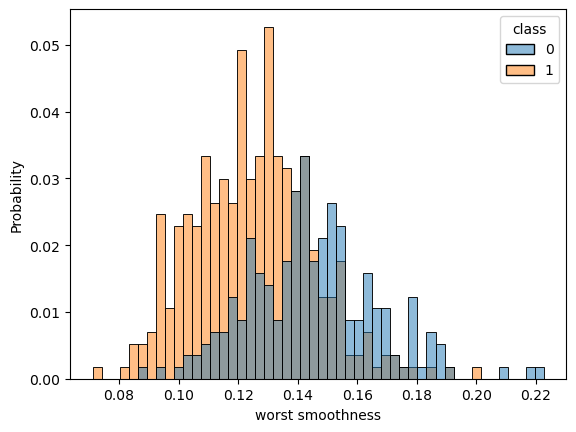

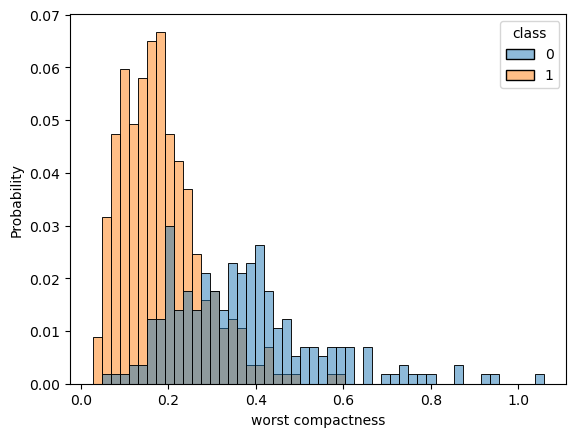

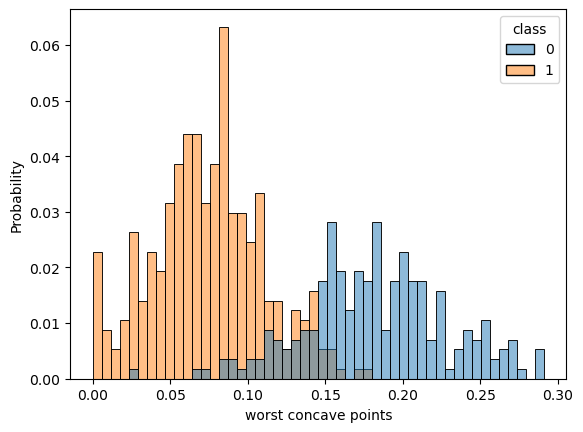

In [14]:
for c in cols[:-1]:
    sns.histplot(df, x=c, hue=cols[-1], bins=50, stat='probability')
    plt.show()

In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [16]:
data=torch.from_numpy(df[cols].values).float()
data.shape

torch.Size([569, 11])

In [18]:
x=data[:, :-1]
y=data[:, -1:]
print(x.shape)
print(y.shape)

torch.Size([569, 10])
torch.Size([569, 1])


In [19]:
n_epochs=200000
learning_rate=1e-2
print_interva=10000

In [21]:
class MyModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        self.input_dim=input_dim
        self.output_dim=output_dim

        super().__init__()

        self.linear=nn.Linear(input_dim, output_dim)
        self.act=nn.Sigmoid()

    def forward(self, x):
        y=self.act(self.linear(x))
        return y

In [22]:
model=MyModel(input_dim=x.size(-1), output_dim=y.size(-1))
crit=nn.BCELoss()
optimizer=optim.SGD(model.parameters(), lr=learning_rate)

In [23]:
for i in range(n_epochs):
    y_hat=model(x)

    loss=crit(y_hat, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1)% print_interva==0:
        print('epoch:', (i+1), 'loss:', loss.item())

epoch: 10000 loss: tensor(0.2743, grad_fn=<BinaryCrossEntropyBackward0>)
epoch: 20000 loss: tensor(0.2268, grad_fn=<BinaryCrossEntropyBackward0>)
epoch: 30000 loss: tensor(0.1984, grad_fn=<BinaryCrossEntropyBackward0>)
epoch: 40000 loss: tensor(0.1798, grad_fn=<BinaryCrossEntropyBackward0>)
epoch: 50000 loss: tensor(0.1667, grad_fn=<BinaryCrossEntropyBackward0>)
epoch: 60000 loss: tensor(0.1571, grad_fn=<BinaryCrossEntropyBackward0>)
epoch: 70000 loss: tensor(0.1497, grad_fn=<BinaryCrossEntropyBackward0>)
epoch: 80000 loss: tensor(0.1438, grad_fn=<BinaryCrossEntropyBackward0>)
epoch: 90000 loss: tensor(0.1391, grad_fn=<BinaryCrossEntropyBackward0>)
epoch: 100000 loss: tensor(0.1351, grad_fn=<BinaryCrossEntropyBackward0>)
epoch: 110000 loss: tensor(0.1318, grad_fn=<BinaryCrossEntropyBackward0>)
epoch: 120000 loss: tensor(0.1290, grad_fn=<BinaryCrossEntropyBackward0>)
epoch: 130000 loss: tensor(0.1265, grad_fn=<BinaryCrossEntropyBackward0>)
epoch: 140000 loss: tensor(0.1243, grad_fn=<Bin

In [25]:
correct_cnt=(y==(y_hat>0.5)).sum()
total_count=float(y.size(0))
print('Accuracy:%.4f'%(correct_cnt/total_count))

Accuracy:0.9666


In [27]:
df=pd.DataFrame(torch.cat([y, y_hat], dim=1).detach().numpy(), columns=['y','y_hat'])
df

y         y_hat
0    0.0  3.334269e-06
1    0.0  9.741125e-04
2    0.0  5.974774e-04
3    0.0  1.516138e-02
4    0.0  8.478070e-02
..   ...           ...
564  0.0  4.942950e-04
565  0.0  8.171697e-04
566  0.0  4.587525e-02
567  0.0  8.899095e-07
568  1.0  9.953532e-01

[569 rows x 2 columns]

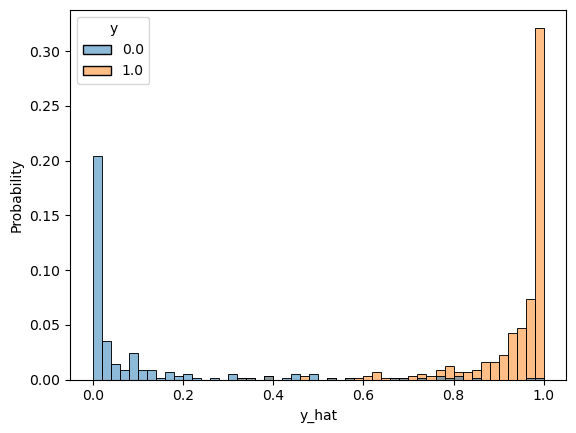

In [28]:
sns.histplot(df, x='y_hat', hue='y', bins=50, stat='probability')
plt.show()